<center><h2>Depth and Depth-Based Classification</h2></center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
import seaborn as sns

1. From each of them, draw a data set containing 25 points and plot it, each on a separate plot.

In [97]:
def rand_bi_gauss(n, mu, sigma) :
    """ Sample n1 and n2 points from two Gaussian variables centered in mu1,
    mu2, with respective std deviations sigma1 and sigma2
    """
    X = np.random.multivariate_normal(mu, sigma, n)
    y = np.random.randint(2, size=n)
    return X, y

In [111]:
symlist = ['o', 's', 'D', 'x', '+', '*', 'p', 'v', '-', '^']
def plot_2d(data, y=None, w=None, alpha_choice=1):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""

    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette("colorblind", k)
    sns.set_palette(color_blind_list)
    if y is None:
        labs = [""]
        idxbyclass = [range(data.shape[0])]
    else:
        labs = np.unique(y)
        idxbyclass = [np.where(y == labs[i])[0] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.scatter(data[idxbyclass[i], 0], data[idxbyclass[i], 1],
                    c=color_blind_list[i], s=80, marker=symlist[i])
    plt.ylim([np.min(data[:, 1]), np.max(data[:, 1])])
    plt.xlim([np.min(data[:, 0]), np.max(data[:, 0])])
    mx = np.min(data[:, 0])
    maxx = np.max(data[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=alpha_choice)

In [119]:
X1, y1 = rand_bi_gauss(25, [0,0], [[1,1], [1,4]])
X2, y2 = rand_bi_gauss(25, [2,2], [[1,1], [1,4]])
X3, y3 = rand_bi_gauss(25, [0,0], [[4,4], [4,16]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


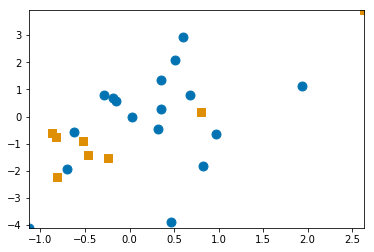

In [120]:
plot_2d(X1, y1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


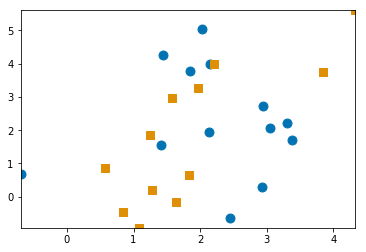

In [122]:
plot_2d(X2, y2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


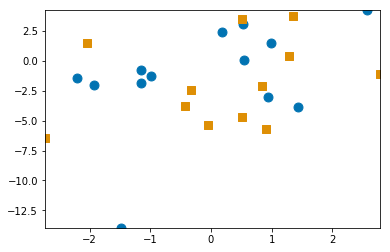

In [123]:
plot_2d(X3, y3)

2. Program a function depthMah that computes the Mahalanobis depth and takes as input arguments the points for which the depth should be computed and the data set with respect to which the depth is to be computed. Apply this function to each of the data sets from question 1, i.e., calculate the depth of each point of the data set with respect to the data set itself; plot the data sets indicating on the plots depth value (rounded to two digits after the period) next to each point.

In [134]:
np.linalg.inv(np.cov(X1))

array([[-2.64792731e+16,  8.19409038e+16, -3.75606287e+16,
        -5.40532146e+16,  9.47651545e+15, -4.13836131e+16,
         1.07409466e+16,  1.25002517e+15, -5.54033809e+16,
        -6.36898583e+16, -2.86059816e+16,  9.74966824e+15,
        -4.88576516e+17, -1.25341374e+16, -2.58329149e+15,
         4.40137372e+15, -2.82694570e+16,  3.31730898e+16,
         1.39031290e+16, -7.88401857e+15, -4.59002832e+17,
        -9.37603030e+15,  3.56774916e+16, -1.65924530e+17,
        -1.48654063e+16],
       [ 5.10235193e+17, -1.86641448e+18,  7.20185883e+17,
         1.08340196e+18, -2.80504020e+17,  9.54088366e+17,
        -1.74507830e+17, -6.97998635e+15,  3.01771570e+17,
         1.26404048e+18,  6.02885502e+17, -2.02281952e+17,
         1.08586853e+19,  2.17459242e+17,  7.02045160e+16,
        -3.60876441e+16,  6.36575614e+17, -8.16115838e+17,
        -5.31971203e+17,  1.89778420e+17,  8.76664577e+18,
         2.51638898e+17, -9.26332203e+17,  2.91921716e+18,
         4.36627497e+17],
    

In [138]:
(X1-X1.mean()).T.dot(np.linalg.inv(np.cov(X1))).dot(X1-X1.mean())

array([[-9.55802114e+17, -9.55802114e+17],
       [-9.55802114e+17, -9.55802114e+17]])

In [157]:
def depthMah(x,X) :
    mu_X = X.mean()
    sigma = np.cov(X.T)
    sigma_1 = np.linalg.inv(sigma)
    dist = (x-mu_X).T.dot(sigma_1).dot(x-mu_X)
    return 1/(1+dist)

In [159]:
depth = []
for obs in X1 :
    depth.append(depthMah(obs,X1))

In [184]:
symlist = ['o', 's', 'D', 'x', '+', '*', 'p', 'v', '-', '^']
def plot_2d(data, y=None, w=None, alpha_choice=1):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""

    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette("colorblind", k)
    sns.set_palette(color_blind_list)
    if y is None:
        labs = [""]
        idxbyclass = [range(data.shape[0])]
    else:
        labs = np.unique(y)
        idxbyclass = [np.where(y == labs[i])[0] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.scatter(data[idxbyclass[i], 0], data[idxbyclass[i], 1],
                    c=color_blind_list[i], s=depth[i]*500, marker='o')
        #plt.annotate(depth, (data[idxbyclass[i], 0], data[idxbyclass[i], 1]))
    plt.ylim([np.min(data[:, 1]), np.max(data[:, 1])])
    plt.xlim([np.min(data[:, 0]), np.max(data[:, 0])])
    mx = np.min(data[:, 0])
    maxx = np.max(data[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=alpha_choice)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


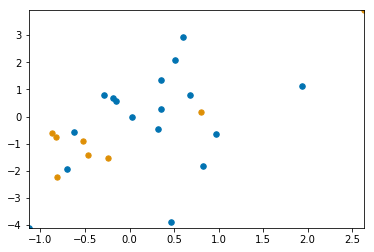

In [185]:
plot_2d(X1, y1)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))